In [1]:
import import_ipynb
import numpy as np
import cv2
import imutils
from matplotlib import pyplot as plt

In [2]:
img_bgr = cv2.imread('C:\\Users\\Ziad Elbouriny\\Downloads\\test3.png')
img_grey = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)

_, thresh = cv2.threshold(img_grey, 240, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

In [10]:
for contour in contours:
    approx = cv2.approxPolyDP(contour, 0.01* cv2.arcLength(contour, True), True)
    cv2.drawContours(img, [approx], 0, (0, 0, 0), 5)
    x = approx.ravel()[0]
    y = approx.ravel()[1] - 5
    if len(approx) == 3:
        cv2.putText(img, "Triangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
    elif len(approx) == 4:
        x1 ,y1, w, h = cv2.boundingRect(approx)
        aspectRatio = float(w)/h
        if aspectRatio >= 0.95 and aspectRatio <= 1.05:
            cv2.putText(img, "square", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
        else:
            cv2.putText(img, "rectangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5,(30, 255, 255))
    elif len(approx) == 5:
        cv2.putText(img, "Pentagon", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
    elif len(approx) == 10:
        cv2.putText(img, "Star", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
    else:
        cv2.putText(img, "Circle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))

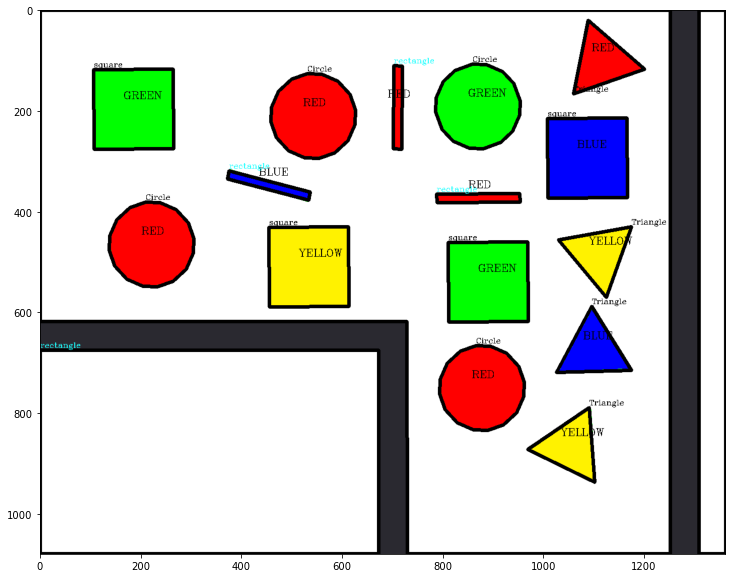

In [11]:
plt.figure(figsize=(15,10))
plt.imshow(img)

In [12]:
lower_red = np.array([0,50,120])
upper_red = np.array([10,255,255])

lower_blue = np.array([90,60,0])
upper_blue = np.array([121,255,255])

lower_green = np.array([40,70,80])
upper_green = np.array([70,255,255])

lower_yellow = np.array([25,70,120])
upper_yellow = np.array([30,255,255])

mask1 = cv2.inRange(img_hsv,lower_red,upper_red)
mask2 = cv2.inRange(img_hsv,lower_blue,upper_blue)
mask3 = cv2.inRange(img_hsv,lower_green,upper_green)
mask4 = cv2.inRange(img_hsv,lower_yellow,upper_yellow)

In [13]:

cnts1 = cv2.findContours(mask1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts1 = imutils.grab_contours(cnts1)

cnts2 = cv2.findContours(mask2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts2 = imutils.grab_contours(cnts2)

cnts3 = cv2.findContours(mask3, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts3 = imutils.grab_contours(cnts3)

cnts4 = cv2.findContours(mask4, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts4 = imutils.grab_contours(cnts4)

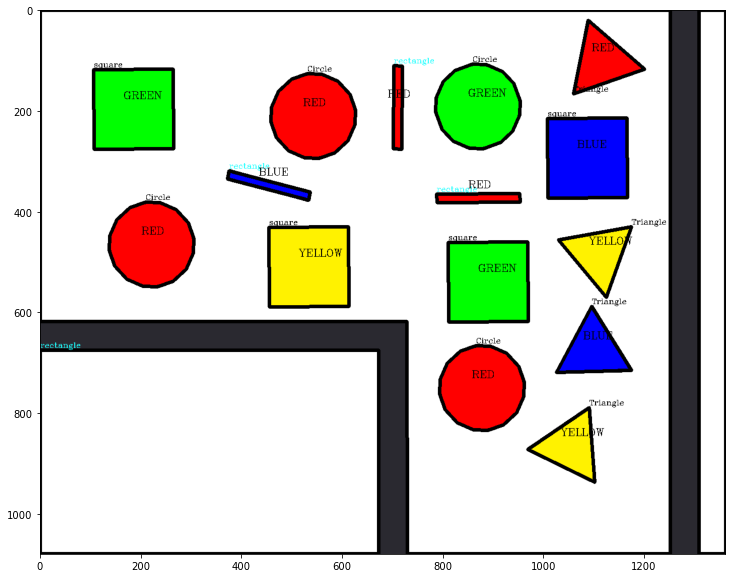

In [18]:
for c in cnts1:
    area1 = cv2.contourArea(c)
    if area1 > 500:
        cv2.drawContours(img,[c],-1,(0,0,0), 3)

        M = cv2.moments(c)

        cx = int(M["m10"]/ M["m00"])
        cy = int(M["m01"]/ M["m00"])
        cv2.putText(img, "RED", (cx-20, cy-20), cv2.FONT_HERSHEY_COMPLEX, 0.7, (0, 0, 0))
        
for c in cnts2:
    area2 = cv2.contourArea(c)
    if area2 > 500:
        cv2.drawContours(img,[c],-1,(0,0,0), 3)

        M = cv2.moments(c)

        cx = int(M["m10"]/ M["m00"])
        cy = int(M["m01"]/ M["m00"])
        cv2.putText(img, "BLUE", (cx-20, cy-20), cv2.FONT_HERSHEY_COMPLEX, 0.7, (0, 0, 0))
        
for c in cnts3:
    area3 = cv2.contourArea(c)
    if area3 > 500:
        cv2.drawContours(img,[c],-1,(0,0,0), 3)

        M = cv2.moments(c)

        cx = int(M["m10"]/ M["m00"])
        cy = int(M["m01"]/ M["m00"])
        cv2.putText(img, "GREEN", (cx-20, cy-20), cv2.FONT_HERSHEY_COMPLEX, 0.7, (0, 0, 0))
        
for c in cnts4:
    area4 = cv2.contourArea(c)
    if area4 > 500:
        cv2.drawContours(img,[c],-1,(0,0,0), 3)

        M = cv2.moments(c)

        cx = int(M["m10"]/ M["m00"])
        cy = int(M["m01"]/ M["m00"])
        cv2.putText(img, "YELLOW", (cx-20, cy-20), cv2.FONT_HERSHEY_COMPLEX, 0.7, (0, 0, 0))
    
plt.figure(figsize=(15,10))
plt.imshow(img);